In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import time

# <center> Fourier transform and physics Part I </center>

## <center> Nyquist frequency </center>

There is an upper-bound to the frequencies that can be accurately detected by a Fourier transform, dependent on the frequency of your sampling. This upper-bound is related to aliasing, in which two frequencies become indistinguishable because of your sampling.

Consider for example the pure cosine wave,
\begin{equation}
f(t) = \cos(2 \pi t)
\end{equation}

This pure cosine wave has a frequency of one. What happens if we sample at the same frequency?

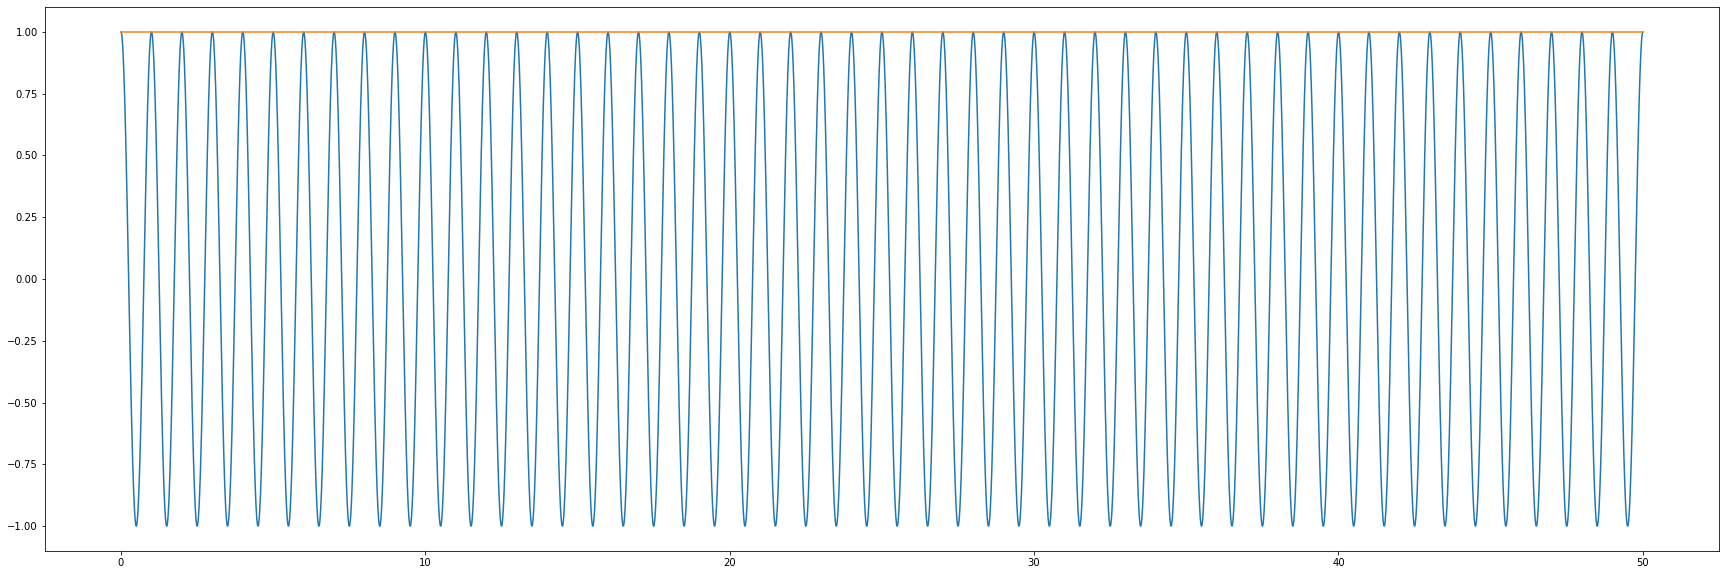

In [2]:
def f(t):
    return np.cos(2 * np.pi * t)

T = 50

## we use a mesh with finer sampling to compare the two data sets
N_fine = 1_000_000
t_fine = np.linspace(0,T,N_fine)
f_fine = f(t_fine)

ratio = 1
N_coarse = ratio*(T + 1)
t_coarse = np.linspace(0,T,N_coarse)
f_coarse = f(t_coarse)

plt.figure(figsize=(30,10))
plt.plot(t_fine,f_fine)
plt.plot(t_coarse,f_coarse)

It looks like we had just mistaken data that has a frequency of 1 Hz to data that has a frequency of 0 Hz. Of course if we sample with a frequency of 100 Hz, we seem to be detecting the 1 Hz wave.

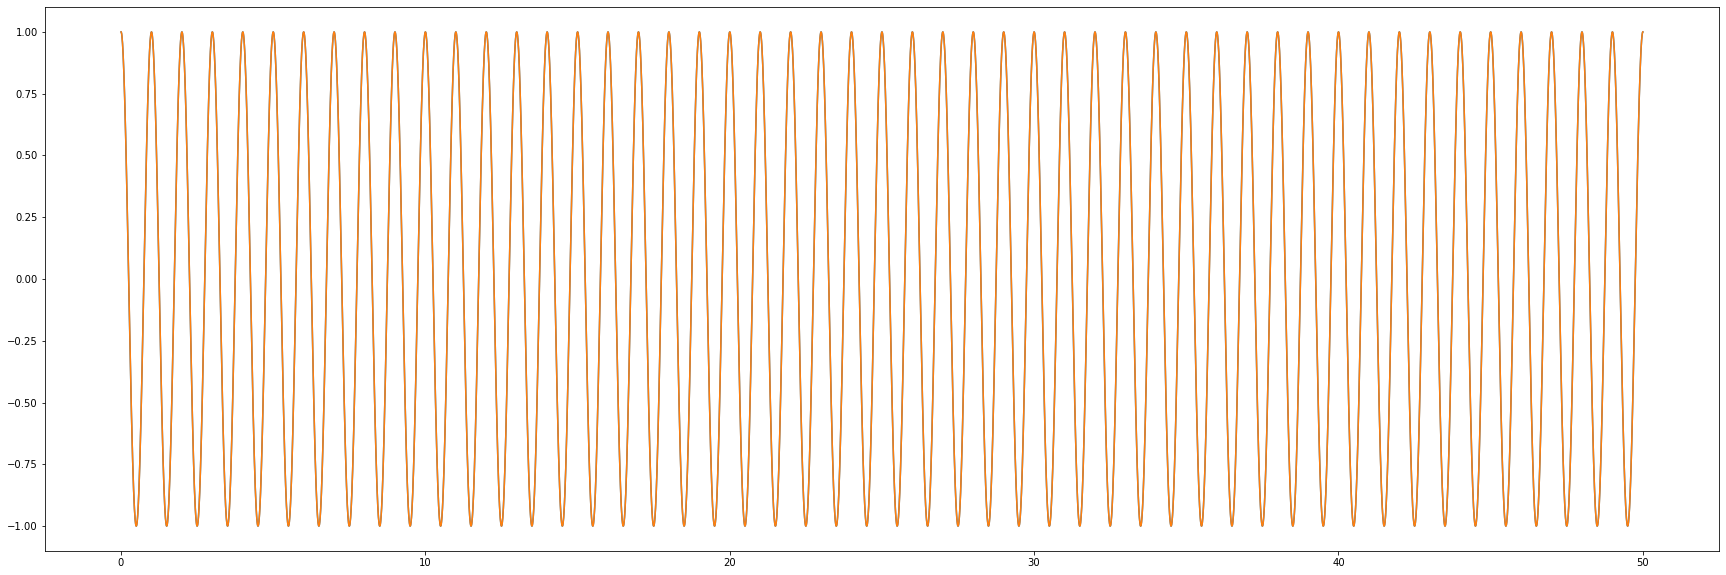

In [3]:
T = 50

## we use a mesh with finer sampling to compare the two data sets
N_fine = 1_000_000
t_fine = np.linspace(0,T,N_fine)
f_fine = f(t_fine)

ratio = 100
N_coarse = ratio*(T + 1)
t_coarse = np.linspace(0,T,N_coarse)
f_coarse = f(t_coarse)

plt.figure(figsize=(30,10))
plt.plot(t_fine,f_fine)
plt.plot(t_coarse,f_coarse)

So clearly there is a transition from a high sampling rate that accurately captures the frequency content of the data, to a low sampling that fails to capture this frequency content.

What ratio of sampling frequency to data frequency would you like? 1.01


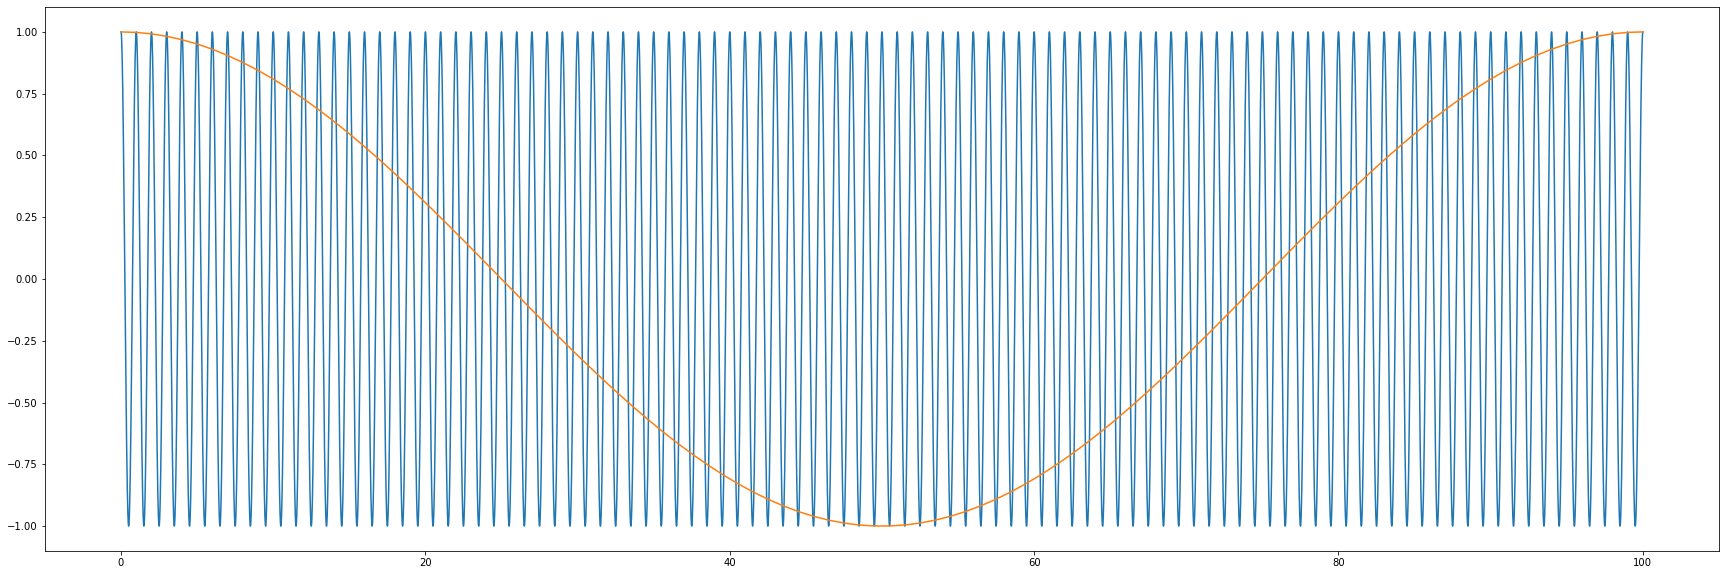

In [5]:
T = 100

## we use a mesh with finer sampling to compare the two data sets
N_fine = 1_000_000
t_fine = np.linspace(0,T,N_fine)
f_fine = f(t_fine)

ratio = float(input('What ratio of sampling frequency to data frequency would you like? '))
N_coarse = int(ratio*(T + 1))
t_coarse = np.linspace(0,T,N_coarse)
f_coarse = f(t_coarse)

plt.figure(figsize=(30,10))
plt.plot(t_fine,f_fine)
plt.plot(t_coarse,f_coarse)

We note the following:
1. If the sampling rate is less than twice the frequency of the data, the sampled data fails to capture the frequency content of the data.
2. If the sampling rate is higher than 2, the pure tone gets detected as a combination of two closely related frequencies (hence the beat phenomenon)

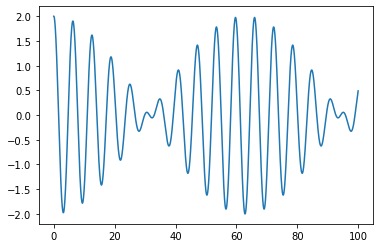

In [5]:
freq = 1
epsilon = 5E-2

plt.plot(t_fine, np.cos((freq+epsilon)*t_fine)+np.cos((freq-epsilon)*t_fine))

We may demonstrate this using the FFT. We first note that we need to get the nearest power of 2 so that the FFT is as quick as possible. We also note that if we sample $2^n$ points over a period of $T$, then the FFT measures frequencies equally spaced on the interval $\left[-\dfrac{n}{2T}, \dfrac{n}{2T} \right]$. This follows from the form of the discrete fourier transform
\begin{equation}
f(t) = \sum_{k = -n/2}^{n/2} \alpha_k \exp \left( i \dfrac{2 \pi k t}{T} \right)
\end{equation}
Thus each coefficient $\alpha_k$ represents the amplitude of a pure tone whose frequency is $\dfrac{k}{T}$.

What ratio of sampling frequency to data frequency would you like? 4
Nearest power of 2 is 5. Sampling at 3.3 Hz.


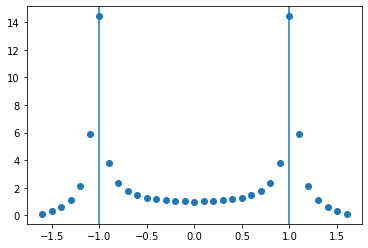

In [6]:
T = 10

ratio = float(input('What ratio of sampling frequency to data frequency would you like? '))

## we need to get the closest power of 2
power = int(np.log2(ratio*(T + 1)))
N_coarse = 2**power + 1
print('Nearest power of 2 is {0}. Sampling at {1} Hz.'.format(power, N_coarse/T))

t_coarse = np.linspace(0,T,N_coarse)
f_coarse = f(t_coarse)

f_coarse_fft = np.fft.fft(f_coarse)
freqs = N_coarse/T*np.fft.fftfreq(N_coarse)

#plt.plot(freqs,np.real(f_coarse_fft))
#plt.plot(freqs,np.imag(f_coarse_fft))
plt.scatter(freqs,abs(f_coarse_fft))
plt.axvline(-1)
plt.axvline(1)

Let's change it so that we just give it a list of powers of 2

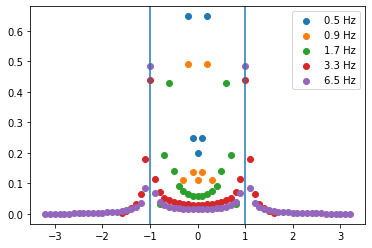

In [7]:
T = 10

## we need to get the closest power of 2
minpower = 2
maxpower = 6
powers = np.arange(minpower,maxpower+1)

## We need to get 
for power in powers:
    N_coarse = 2**power + 1
    t_coarse = np.linspace(0,T,N_coarse)
    f_coarse = f(t_coarse)

    f_coarse_fft = np.fft.fft(f_coarse)
    freqs = N_coarse/T*np.fft.fftfreq(N_coarse)

    #plt.plot(freqs,np.real(f_coarse_fft))
    #plt.plot(freqs,np.imag(f_coarse_fft))
    plt.scatter(freqs,abs(f_coarse_fft)/N_coarse, label='{0} Hz'.format(N_coarse/T))

plt.axvline(-1)
plt.axvline(1)
plt.legend()

This is true even when there are several frequencies involved.

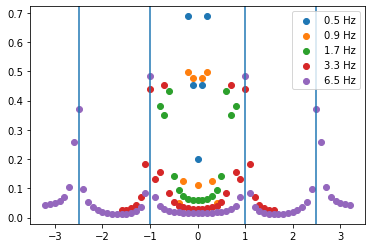

In [8]:
def f2(t):
    return np.cos(2 * np.pi * t) + np.sin(5 * np.pi * t)

T = 10

tones = [-1,1,2.5,-2.5]

## we need to get the closest power of 2
minpower = 2
maxpower = 6
powers = np.arange(minpower,maxpower+1)

## We need to get 
for power in powers:
    N_coarse = 2**power + 1
    t_coarse = np.linspace(0,T,N_coarse)
    f_coarse = f2(t_coarse)

    f_coarse_fft = np.fft.fft(f_coarse)
    freqs = N_coarse/T*np.fft.fftfreq(N_coarse)

    #plt.plot(freqs,np.real(f_coarse_fft))
    #plt.plot(freqs,np.imag(f_coarse_fft))
    plt.scatter(freqs,abs(f_coarse_fft)/N_coarse, label='{0} Hz'.format(N_coarse/T))

for tone in tones:
    plt.axvline(tone)
plt.legend()

This upper bound for which the discrete Fourier transform fails to resolve frequency data is called the Nyquist frequency. It has a very simply form: if one is sampling at a frequency of $f_s$, the the Nyquist frequency is simply,
\begin{equation}
f_{Nyq} = \dfrac{f_s}{2}
\end{equation}

In sampling theory, this result follows visually: your sampling rate $f_s$ defines the lower and upper bounds of your discrete Fourier transform. If the lower and upper bounds do not encompass the frequency in question, then no wonder it can't resolve it!

Less trivially, the Nyquist frequency crops up in all sorts of numerical methods. Some physical process have a distinct timescale and lengthscale for their dynamics, captured by the differential equation that models that physical process. One can think of a discretization of that differential equation as a sampling of data.

Fourier analysis can then be deployed to determine whether or not the discretization is sufficiently fine to capture the relevant physics. If it doesn't, then you are assured that the numerical method would fail in some way.

## <center> Interpolation </center>

Recall the geometric series,
\begin{equation}
\dfrac{1}{1-r} = \sum_{k = 0}^\infty r^k, \qquad -1 \leq r \leq 1
\end{equation}

If we truncate this series to some $N$, we get a polynomial that approximates the function $\dfrac{1}{1-r}$ on the interval $[-1,1]$.

What truncation order would you like? 5


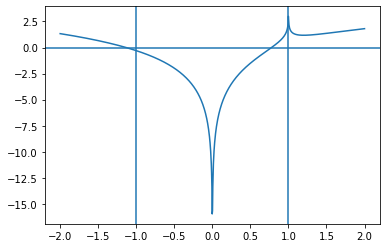

In [45]:
rmin = -2
rmax = 2
n = 1_000
N = int(input('What truncation order would you like? '))
r = np.linspace(rmin, rmax, n)
geom_exact = 1/(1-r)
geom_trunc = 0
for k in range(N+1):
    geom_trunc += r**k
    
plt.plot(r,np.log10(abs(geom_exact-geom_trunc)))
plt.axvline(-1)
plt.axvline(1)
plt.axhline(0)

One question one might ask: why does the truncated polynomial fail to converge for $r < -1$. The function being approximated is well behaved in that region. What gives?

In fact, there is a circle of convergence on the complex plane, centered around $r = 0$, outside which the polynomial fails to be accurate.

What truncation order would you like? 5


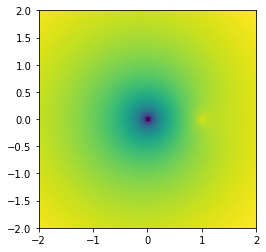

In [58]:
n = 100
N = int(input('What truncation order would you like? '))

reals = np.linspace(-2,2,n)
imags = np.linspace(-2,2,n)

geom_exact = np.zeros((n,n), dtype = 'complex128')
geom_truct = np.zeros((n,n), dtype = 'complex128')

for i in range(n):
    for j in range(n):
        r = reals[i] + imags[j]*1j
        geom_exact[j,i] = 1/(1-r)
        for k in range(N+1):
            geom_truct[j,i] += r**k

plt.imshow(np.log10(abs(geom_exact-geom_truct)), origin='lower', extent=[-2,2,-2,2])

We can show this circle more clearly by just keeping the sign.

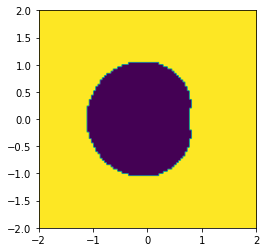

In [59]:
plt.imshow(np.sign(np.log10(abs(geom_exact-geom_truct))), origin='lower', extent=[-2,2,-2,2])

Why does this happend? The polynomial on the righthand side of the geometric series is the Taylor series expansion of the function $\dfrac{1}{1-r}$ around $r = 0$. What if we expand this series around $r = -r_0$?
\begin{equation}
\dfrac{1}{1-r} = \sum_{k = 0}^{\infty} \left( \dfrac{r+r_0}{1+r_0} \right)^k
\end{equation}

What truncation order would you like? 100


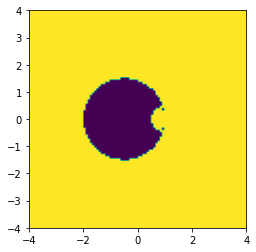

In [74]:
n = 100
r0 = 0.5
low = -4
high = 4
N = int(input('What truncation order would you like? '))

reals = np.linspace(low,high,n)
imags = np.linspace(low,high,n)

geom_exact = np.zeros((n,n), dtype = 'complex128')
geom_truct = np.zeros((n,n), dtype = 'complex128')

for i in range(n):
    for j in range(n):
        r = reals[i] + imags[j]*1j
        geom_exact[j,i] = 1/(1-r)
        r_tilde = (r + r0)/(1+r0)
        for k in range(N+1):
            geom_truct[j,i] += r_tilde**k

plt.imshow(np.sign(np.log10(abs(geom_exact-geom_truct))), origin='lower', extent=[low,high,low,high])

The circle of convergence is now centered around $r = -r0$, with a radius of $1 + r_0$. The following statement is true in general: a Taylor series expansion of any function on the point $z_0$ converges on the complex plane with a radius of convergence equal to the distance of $z_0$ to the nearest pole.

The geometric series has a pole at $r = 1$.

This method of approximating a periodic function with poles on the complex plane becomes untenable; we'd need an expansion around a certain point in each period.

Consider
\begin{equation}
\dfrac{\cosh(1.5) - 1}{\cosh(1.5) - \cos(x)}
\end{equation}

On the real line, this function is well-behaved. However, it has a set of pole on the complex plane of the form
\begin{equation}
k \pi + 3i/2, \qquad k \in Z
\end{equation}

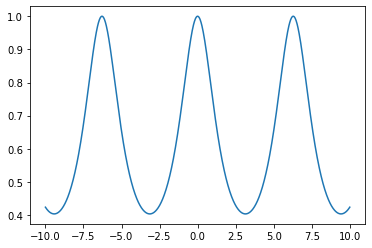

In [94]:
def bad_func(x):
    return (np.cosh(1.5)-1)/(np.cosh(1.5) - np.cos(x))

x = np.linspace(-10,10,1000)
f_x = bad_func(x)

plt.plot(x,f_x)

Fortunately, for periodic function, the region of convergence of the discrete Fourier transform is a strip on the complex plane.

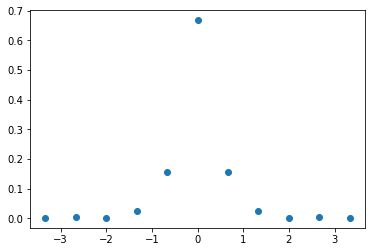

-0.6666666666666666


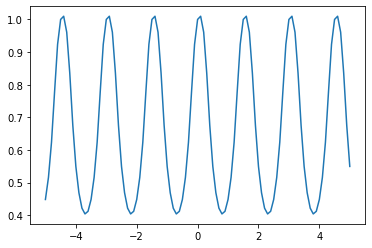

In [214]:
def DFT_interpolate(x_mesh, fft_norm, freqs):
    N = freqs.shape[0]
    output = 0
    for i in range(N):
        output += fft_norm[i] *np.exp(-2*np.pi * freqs[i] * x_mesh * 1j)
    print(freqs[i])
    return output

sample_n = 11
x_sample = np.linspace(0,2*np.pi,sample_n)
f_sample = bad_func(x_sample)

fft_sample = np.fft.fft(f_sample)/sample_n
fft_freqs = sample_n/1.5 * np.fft.fftfreq(sample_n)

plt.scatter(fft_freqs,abs(fft_sample))
plt.show()

interpolate_n = 101
x_interpolate = np.linspace(-5,5, 101)
f_interpolate = DFT_interpolate(x_interpolate, fft_sample,fft_freqs)
plt.plot(x_interpolate, np.real(f_interpolate))

## <center> Data compression and sampling </center>

Suppose you have a square wave, spanning several cycles, sampled at a some large number of points.

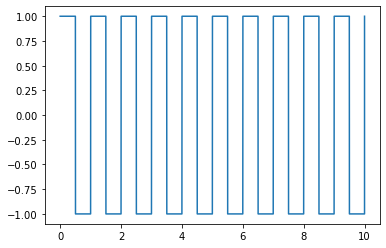

In [14]:
def square(t):
    return -np.sign(2*((t % 1)- 0.5))
    
T = 10
N = 1_000_000
t = np.linspace(0,T,N)
f_t = square(t)

plt.plot(t,f_t)

We actually don't need the full time-series data of the amplitudes for this square-wave to be heard as a square wave. A lot of the points are redundant. We may, as a means to reduce the amount of data we need to store, simply save every other point. Or maybe every three points.

What informs our choice of data compression? If our goal is to capture the shape of the square wave exactly, the above example seems reasonable. We'd only ever gets 1's and -1's, exactly the qualitative features of a square wave.

However, what if our goal is to compress the data in such a way that mitigates it's audible quality for human beings? It seems reasonable to simply cut-off undetectable/inaudible high frequencies.

We shall be doing that. Let us chop up the above signal, and just look at a single cycle.

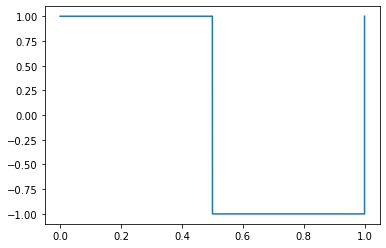

In [217]:
T = 1
N = 100_000
t = np.linspace(0,T,N)
f_t = square(t)

plt.plot(t,f_t)

The first pass we **need** to do to compress this is by using the fact that the data is real. As discussed in the books, this means that the coefficients of the DFT comes in complex conjugate pairs,
\begin{equation}
\alpha_k = \left( \alpha_{-k} \right)^*
\end{equation}

Thus, we only need to store half the fft data to reconstruct the original data. This is automatically done by numpy's **rfft**. Similar to **fftfreq**, we also have the helper function **rfftfreq**.

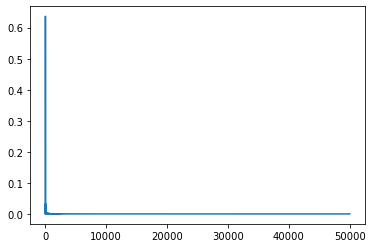

In [26]:
f_rfft = np.fft.rfft(f_t)
rfreq = N/T * np.fft.rfftfreq(N)

plt.plot(rfreq,abs(f_rfft)/N)

We **need** to do this because recall that our initial data is real, while the DFT data is complex. When we store complex numbers, we are actually storing two floating points, and thus twice the amount of data than is necessary!

Notice that most of the data in Fourier space actually is close to zero!

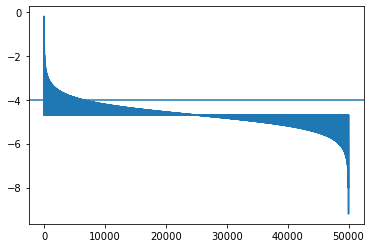

In [30]:
plt.plot(rfreq,np.log10(abs(f_rfft)/N))
plt.axhline(-4)

Thus, if we wish to keep frequencies with up to a relative magnitude of $10^{-4}$, we can actually keep only 1/5 of the data.

In [227]:
def rDFT_interpolate(x_mesh, fft_norm, freqs):
    N = freqs.shape[0]
    output = fft_norm[0] *np.exp(-2*np.pi * freqs[0] * x_mesh * 1j)
    
    for i in range(1, N):
        z = fft_norm[i] *np.exp(-2*np.pi * freqs[i] * x_mesh * 1j)
        output += -(z + np.conj(z))/2
    return output

In [228]:
f_interpolate = rDFT_interpolate(t, (f_rfft/((N+1)/2))[:1_00], rfreq[:1_00])

/home/scfortuna/Programs/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


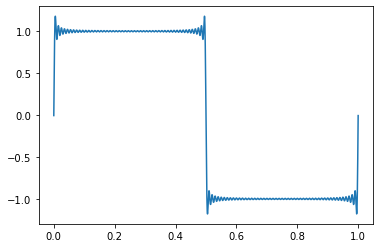

In [229]:
plt.plot(t, f_interpolate)